# Statistics with Data

Lesson 1: understand basic statistics and work with data

Notebook based on book: **Pratical statistics for Data Science**


<img src="Resources/book.png" width="300">

<a id='index-pract-stats'></a>
## Index
1) __Exploratory Data Analysis__ <br>
&nbsp;&nbsp;&nbsp;&nbsp; a) [Dataset in Python](#dataset) <br>
&nbsp;&nbsp;&nbsp;&nbsp; b) [Descriptive Statistics](#descr_stats) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i  -  [Measures of Central Tendency](#central_tend) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii - [Measures of Variability](#variab) <br>
&nbsp;&nbsp;&nbsp;&nbsp; c) [Exploring Binary and Categorical Data](#expl_bin_cat) <br>
&nbsp;&nbsp;&nbsp;&nbsp; d) [Correlation](#correlation) <br>
&nbsp;&nbsp;&nbsp;&nbsp; e) [Exploring Two or More Variables](#expl_var) <br>
2) __Data and Sampling Distribution__ <br>
&nbsp;&nbsp;&nbsp;&nbsp; a) [Random Sampling and Sample Bias](#rand_samp) <br>
&nbsp;&nbsp;&nbsp;&nbsp; b) [Bias](#bias) <br>
&nbsp;&nbsp;&nbsp;&nbsp; c) [Random Selection](#rand_sel) <br>
&nbsp;&nbsp;&nbsp;&nbsp; d) [Selection Bias](#sel_bias) <br>
&nbsp;&nbsp;&nbsp;&nbsp; e) [Sampling Distribution of a Statistic](#samp_distr) <br>
&nbsp;&nbsp;&nbsp;&nbsp; f) [The Bootstrap](#boot) <br>
&nbsp;&nbsp;&nbsp;&nbsp; g) [Confidence Interval](#conf_int) <br>
&nbsp;&nbsp;&nbsp;&nbsp; h) [Normal Distribution](#norm_dist) <br>
&nbsp;&nbsp;&nbsp;&nbsp; i) [Long-Tailed Distributions](#longT_dist) <br>
&nbsp;&nbsp;&nbsp;&nbsp; l) [Poisson and Related Distributions](#poiss_dist) <br>
3) __Statistical Experiments and Significance Testing__ <br>
&nbsp;&nbsp;&nbsp;&nbsp; a) [A/B Testing](#a_b_test) <br>
&nbsp;&nbsp;&nbsp;&nbsp; b) [Hypothesis Tests](#hp_test) <br>
&nbsp;&nbsp;&nbsp;&nbsp; c) [Resampling](#resamp) <br>
&nbsp;&nbsp;&nbsp;&nbsp; d) [Statistical Significance and P-Values](#stat-sign) <br>
&nbsp;&nbsp;&nbsp;&nbsp; e) [Degrees of Freedom](#degr-free) <br>
&nbsp;&nbsp;&nbsp;&nbsp; f) [Multi-Arm Bandit Algorithm](#arm-bandit) <br>

### Exploratory Data Analysis

<a id='dataset'></a>
#### DATASET IN PYTHON

The typical frame of reference for an analysis in data science is a rectangular data object, like a spreadsheet or database table. <br>
- **Dataframe**: Rectangular data is the basic data structure for statistical and machine learning models <br>
- **Feature**: A column in the table <br>
- **Outcome**: Item to predict <br> 
- **Records**: A row in the table <br>
Rectangular data is essentially a two-dimensional matrix with rows indicating records (*cases*) and columns indicating features (*variables*). <br>
Traditional database tables have one or more columns designated as an **index**. <br>
This can vastly improve the efficiency of certain SQL queries. In Python, with the **pandas library**, the basic rectangular data structure is a *DataFrame object*. <br>
By default, an automatic integer index is created for a DataFrame based on the order of the rows. In pandas, it is also possible to set multilevel/hierarchical indexes to improve the efficiency of certain operations.

An example in python:

In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

There are other data structures besides rectangular data.
<br>
- **Time series data** *records successive measurements of the same variable.* 
<br>
- **Spatial data structures**, which are used in mapping and location analytics. The focus of the data is an object (e.g., a house) and its spatial coordinates. 
- **Graph (or network) data structures** are used to represent physical, social, and abstract relationships. For example, a graph of a social network, such as Facebook or LinkedIn, may represent connections between people on the network. Distribution hubs connected by roads are an example of a physical network. 
<br><br>
<a href='https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html'>See the documentation on data frames in Python</a>

[Come back to index](#index-pract-stats)

<a id='descr_stats'></a>
#### DESCRIPTIVE STATISTICS

Descriptive statistics are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire or a sample of a population. <br>
Descriptive statistics are broken down into: <br>
- Measures of central tendency;
- Measures of variability.

<a id='central_tend'></a>
###### Measures of Central Tendency

A basic step in exploring your data is getting a “typical value” for each feature (variable): *an estimate of where most of the data is located (i.e., its **central tendency**)*. <br>
- **Mean**: The sum of all values divided by the number of values <br>
- **Weighted mean**: the sum of all values times a weight divided by the sum of the weights <br>
- **Median**: the value such that one-half of the data lies above and below <br>
- **Weighted median**: the value such that one-half of the sum of the weights lies above and below the sorted data <br>
- **Trimmed mean**: the average of all values after dropping a fixed number of extreme values <br>


Focusing on the *trimmed mean* and the _weighted mean_, we can say: <br>
__Trimmed Mean__ : it is calculated by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. The formula to compute the trimmed mean with *p* smallest and largest values omitted is:

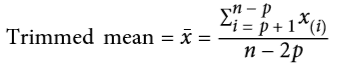
A trimmed mean eliminates the influence of extreme values.

- **Weighted Mean**: it is calculated by multiplying each data value x by a weight w and dividing their sum by the sum of the weights. The formula is the following:
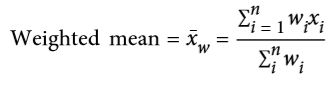

The **median** is the middle number on a sorted list of the data. The median is referred to as a robust estimate of location since it is not influenced by **outliers** (extreme cases) that could skew the results. <br>
*An outlier is any value that is very distant from the other values in a data set.*

An example in python:

In [7]:
import numpy as np
from scipy import stats

mean = df.Fare.mean()
print("Fare's mean:", round(mean,2))
print("-----------------------------")

median = df.Fare.median()
print("Fare's median:", round(median,2))

print("-----------------------------")
Fare_sort = df.Fare.sort_values()
Fare_sort = Fare_sort.reset_index(drop = True)
limit = 0.1
limits = (Fare_sort[round(df.Fare.shape[0]*limit)], Fare_sort[round(df.Fare.shape[0]*(1-limit))])
trimmed_mean = stats.tmean(Fare_sort, limits=limits)
print("Fare's trimmed mean:", round(trimmed_mean,2), "with the following limits:", limits)

print("-----------------------------")
sample = df.Fare.iloc[0:4]
print("I extract a sample from the Fare's column:\n", sample)
weights = [0.25, 0.50, 0.125, 0.125]
print("I define some weights:\n", weights)
weighted_mean = np.average(sample, weights = weights)
print("Fare's weighted mean:", weighted_mean)

Fare's mean: 32.2
-----------------------------
Fare's median: 14.45
-----------------------------
Fare's trimmed mean: 21.52 with the following limits: (7.55, 77.9583)
-----------------------------
I extract a sample from the Fare's column:
 0     7.2500
1    71.2833
2     7.9250
3    53.1000
Name: Fare, dtype: float64
I define some weights:
 [0.25, 0.5, 0.125, 0.125]
Fare's weighted mean: 45.082275


[Come back to index](#index-pract-stats)

<a id='variab'></a>
#### Measures of Variability

**Variability**, also referred to as *dispersion*, measures whether the data values are tightly clustered or spread out. <br>
Below are some of the keywords used in the variability measurements: <br>
- __Deviations__ : The difference between the observed values and the estimate of location
- __Range__ : The difference between the largest and the smallest value in a data set
- __Percentile__ : The value such that P percent of the values take on this value or less and (100-P) percent take on this value or more
- __Interquartile range__ (IQR) : The difference between the 75th percentile and the 25th percentile. <br><br>

It is possible to compute variability with different measures: <br>
- __Variance__ : The sum of squared deviations from the mean divided by n-1 where n is the number of data values 
- __Standard deviation__ : the square root of the variance
- __Mean absolute deviation__ : the mean of the absolute value of the deviations from the mean
- __Median absolute deviation from the median__ : The median of the absolute value of deviations from the median

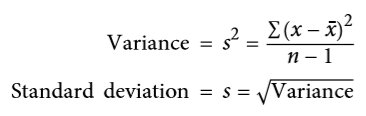

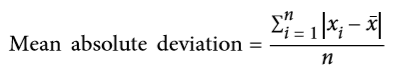

Neither the variance, the standard deviation, nor the mean absolute deviation is robust to outliers and extreme values.<br>
_The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations_.<br>
A robust estimate of variability is the **median absolute deviation** from the median or MAD:
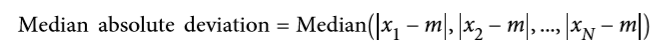
where *m* is the median.

A different approach to estimating dispersion is based on *looking at the spread of the sorted data*. Statistics based on sorted (ranked) data are referred to as **order statistics**. <br>
The most basic measure is the **range**: *the difference between the largest and smallest number*. <br>
To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end. Formally, these types of estimates are based on differences between **percentiles**.

An example in python:

In [8]:
variance = df.Fare.var()
print("Fare's variance:", round(variance,2))
print("-----------------------------")

st_dev = df.Fare.std()
print("Fare's standard deviation:", round(st_dev,2))
print("-----------------------------")

mean_absolute_deviation = df.Fare.mad()
print("Fare's mean absolute deviation:", round(mean_absolute_deviation,2))
print("-----------------------------")


Fare's variance: 2469.44
-----------------------------
Fare's standard deviation: 49.69
-----------------------------
Fare's mean absolute deviation: 28.16
-----------------------------


In [9]:
def MAD(x):
    
    median = x.median()
    deviations_from_median = []
    for i in range(x.shape[0]):
        deviation = abs(x[i] - median)
        deviations_from_median.append(deviation)

    Df = pd.DataFrame(deviations_from_median, columns=['Dev_From_Median'])
    Mad = Df.Dev_From_Median.median()

    return Mad

In [10]:
print("Median Absolute Deviation from the median:", MAD(df.Fare))

Median Absolute Deviation from the median: 6.9042


--------------------------------- __Exercise__ ---------------------------------

Try to compute _measures of central tendancy_ and _variability_ of the following dataset about <a href='https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston' >Boston House price dataset</a>:

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
dataset_boston = boston.data
print("Dataset's dimension:", dataset_boston.shape)

Dataset's dimension: (506, 13)


In [12]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [13]:
df_boston = pd.DataFrame(dataset_boston, columns = boston.feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
if False:
    # Mean of CRIM feature
    mean = _____

    # Median of INDUS feature
    median = _____

    # Trimmed Mean excluding 20% of first and last data
    # (you can try to define a trimmed function)
    ________
    ________
    ________
    ________

    # Variance LSTAT
    ________
    ________


    # Standard Deviation LSTAT
    ________
    ________


    # Median absolute deviation from median
    ________
    ________


[Come back to index](#index-pract-stats)

<a id='expl_data_distri'></a>
#### EXPLORING THE DATA DISTRIBUTION

Each of the estimates we’ve covered sums up the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.

<a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html'>Boxplot</a> are based on percentiles and give a quick way to visualize the distribution of data. 
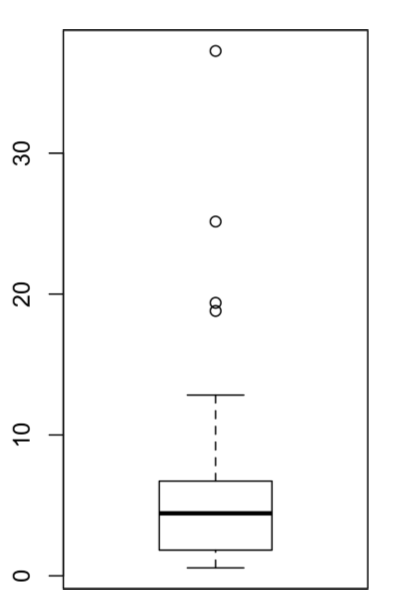
The top and bottom of the box are the 75th and 25th percentiles, respectively. 
<br>
The median is shown by the horizontal line in the box. <br>
The dashed lines, referred to as **whiskers**, extend from the top and bottom to indicate the range for the bulk of the data. <br>
In some charts the *whisker* has a length equal to 1.5 times the height of the box, given by the distance between Q3 and Q1,
also called **interquartile range**; obviously it is lower if the maximum (or the minimum) value observed is distant from Q3 (or Q1) less than 1.5 times the interquartile range.

{'whiskers': [<matplotlib.lines.Line2D at 0x127e9cad0>,
 'caps': [<matplotlib.lines.Line2D at 0x127ea3510>,
 'boxes': [<matplotlib.lines.Line2D at 0x127e8cd50>],
 'medians': [<matplotlib.lines.Line2D at 0x127ea3f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x127eac490>],
 'means': []}

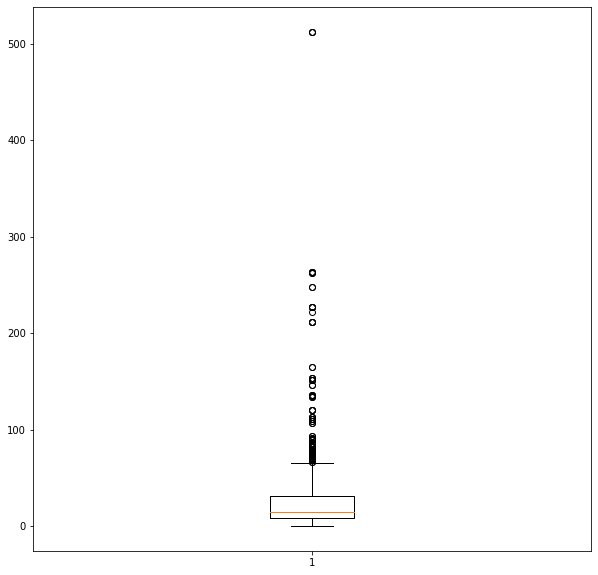

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(df.Fare)

A **frequency table** of a variable divides up the variable range into equally spaced segments, and tells us how many values fall in each segment.

In [16]:
# We cut the distribution in bucket
df['bins'] = pd.cut(df['Fare'], 10)

# We count how many times is frequent each bucket
a = df.groupby('bins').size()
a

bins
(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(153.699, 204.932]      2
(204.932, 256.165]     11
(256.165, 307.398]      6
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
(461.096, 512.329]      3
dtype: int64

A **histogram** is a way to visualize a frequency table, with bins on the x-axis and data count on the y-axis. <br>
For most data sets, a histogram created from the data will be classified as one of the following: <br>
- __Symmetric__: A histogram is symmetric if it has a single peak and looks approximately the same to the left of the peak as to the right of the peak.
- __Skewed right__ (*positively skewed*): A histogram is skewed right (positively skewed) if it has a single peak and the values of the data set extend much farther to the right of the peak than to the left of the peak.
- __Skewed left__ (*negatively skewed*): A histogram is skewed left (negatively skewed) if it has a single peak and the values of the data set extend much farther to the left of the peak than to the right of the peak.
- __Multiple peaks__: When a histogram exhibits multiple peaks, it usually means that data from two or more populations are being graphed together.

Skewness Distribution: 4.78


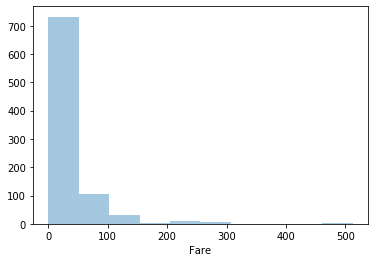

In [17]:
import seaborn as sns

dist = sns.distplot(df.Fare, bins=10, kde = False)
print("Skewness Distribution:", round(stats.skew(df.Fare),2))

A **density plot** can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate

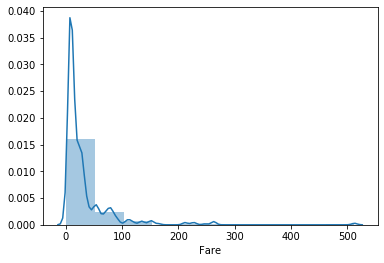

In [18]:
import seaborn as sns

hist_withf = sns.distplot(df.Fare, bins=10, kde = True)

[Come back to index](#index-pract-stats)

<a id='expl_bin_cat'></a>
#### EXPLORING BINARY AND CATEGORICAL DATA

For categorical data, simple proportions or percentages tell the story of the data. <br>
- **Mode**: the most commonly occurring category or value in a data set <br>
- **Expected value**: when the categories can be associated with a numeric value, this gives an average value based on a category's probability of occurrence. <br>
- **Bar charts**: the frequency or proportion for each category plotted as bars <br>
- **Pie charts**: the frequency or proportion for each category plotted as wedges in a pie.

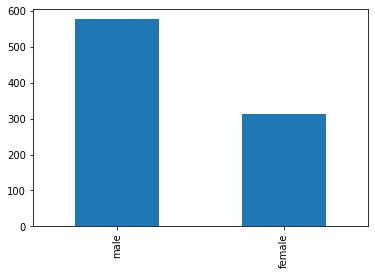

In [19]:
freq_table = df.Sex.value_counts()
xaxis = freq_table.index
value = freq_table.values

ax = freq_table.plot.bar(x=xaxis, y=value)

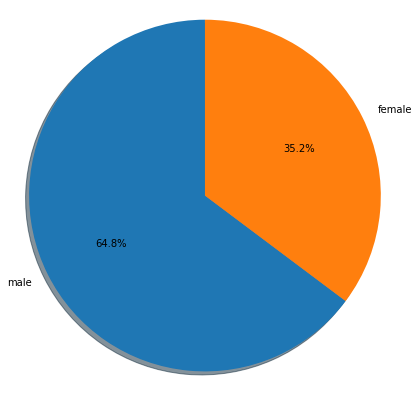

In [20]:
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(value, labels=xaxis, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

[Come back to index](#index-pract-stats)

<a id='correlation'></a>
#### CORRELATION

Variables X and Y (each with measured data) are said to be **positively correlated** if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are **negatively correlated**. <br>
- **Correlation coefficient**: a metric that measures the extent to which numeric variables are associated with one another (ranges from -1 to +1) <br>
- **Correlation matrix**: a table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables <br>
- **Scatterplot**: a plot in which the x-axis is the value of one variable, and the y-axis the value of another

The *correlation coefficient*, which gives an estimate of the correlation between two variables that always lies on the same scale. To compute **Pearson’s correlation coefficient**, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:
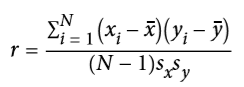
The correlation coefficient always lies between +1 (*perfect positive correlation*) and –1 (*perfect negative correlation*); 0 indicates no correlation.


We make an example withe loaded dataset:

In [21]:
print("Correlation Matrix:")
df.loc[:,['Pclass', 'Age','Fare']].corr()

Correlation Matrix:


,Pclass,Age,Fare
Pclass,1.000000,-0.369226,-0.549500
Age,-0.369226,1.000000,0.096067
Fare,-0.549500,0.096067,1.000000


Scatter plot between Fare and Passenger's Class


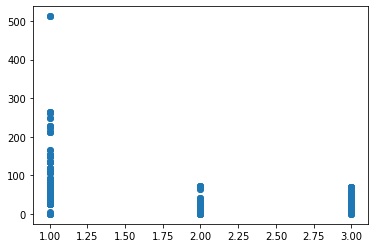

In [22]:
print("Scatter plot between Fare and Passenger's Class")
plt.scatter(df.Pclass, df.Fare)
plt.show()

Looking at the data from the matrix above can be a bit tedious, however you can get around this problem by viewing the correlation matrix by a heatmap chart:

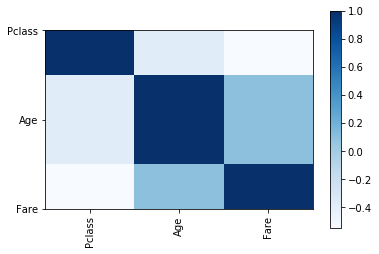

In [23]:
df_corr = df.loc[:,['Pclass', 'Age','Fare']]
plt.imshow(df_corr.corr(), cmap = plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df_corr.columns))]
plt.xticks(tick_marks, df_corr.columns, rotation='vertical')
plt.yticks(tick_marks, df_corr.columns)
plt.show()

[Come back to index](#index-pract-stats)

<a id='expl_var'></a>
#### EXPLORING TWO OR MORE VARIABLES

Familiar estimators like mean and variance look at variables one at a time (**univariate analysis**). Correlation analysis is an important method that compares two variables (**bivariate analysis**). <br>
In this section we look at additional estimates and plots, and at more than two variables (**multivariate analysis**). <br>
- **Contingency Tables**: a tally of counts between two or more categorical variables <br>
- **Hexagonal binning**: a plot of two numeric variables with the records binned into hexagons <br>
- **Contour plots**: a plot showing the density of two numeric variables like a topographical map <br>
- **Violin**: similar to a boxplot but showing the density estimate

###### Plotting Numeric VS Numeric

*Scatterplots are fine when there is a __relatively small number of data values__*. <br>
For datasets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. <br>
For example with a <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html'>Hexagonal binning</a>

In [24]:
fifa = pd.read_csv('data_fifa19.csv', index_col = 0)
fifa.head()
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

Scatter plot between Football player's Age and its Overall Score


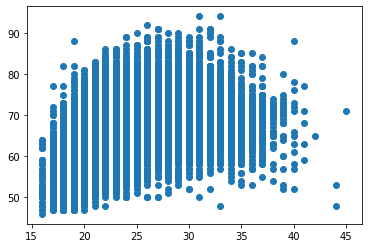

In [25]:
print("Scatter plot between Football player's Age and its Overall Score")
plt.scatter(fifa.Age, fifa.Overall)
plt.show()

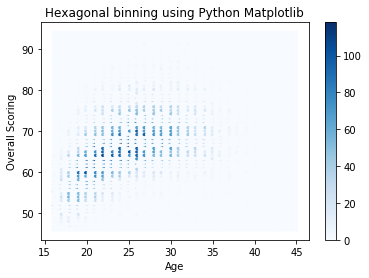

In [26]:
xData = fifa.Age
yData = fifa.Overall


# Plot the hexbin using the data genererated by numpy
plt.hexbin(xData, yData, gridsize=100, cmap='Blues')
plt.colorbar()
# Provide the title for the plot
plt.title('Hexagonal binning using Python Matplotlib')

# Give x axis label for the spike raster plot
plt.xlabel('Age')

# Give y axis label for the spike raster plot
plt.ylabel('Overall Scoring')

# Display the plot
plt.show()

 Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. 

Or we can use the <a href='https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html'>contours</a> chart. The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a *peak*. <br>
The *contour interval* of a contour map is the difference in elevation between successive contour lines. <br>
More generally, a *contour line* for a function of two variables is a curve connecting points where the function has the same particular value.
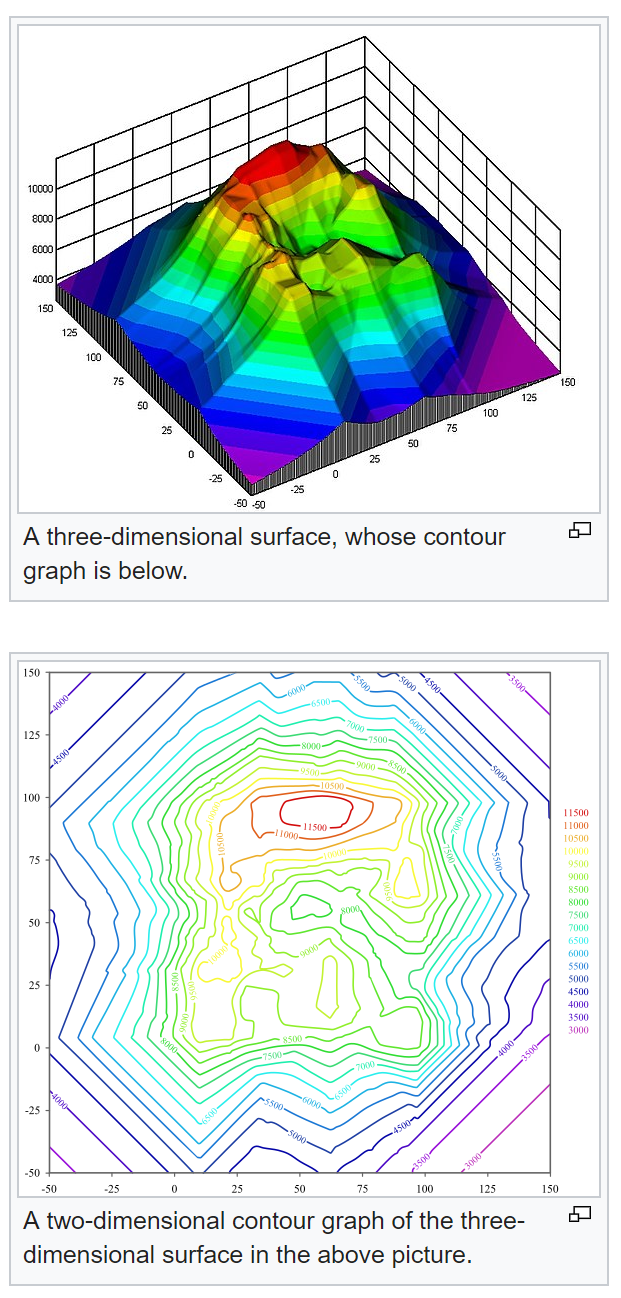

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 16.  4.  0.  4. 16. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


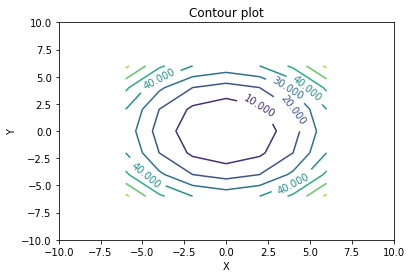

In [27]:
import numpy as np
import matplotlib.pyplot as plot
import pylab

# List of points in x axis
XPoints     = []

# List of points in y axis
YPoints     = []

# X and Y points are from -6 to +6 varying in steps of 2 
for val in range(-6, 8, 2):
    XPoints.append(val)
    YPoints.append(val)

# Z values as a matrix
ZPoints     = np.ndarray((7,7))

# Populate Z Values (a 7x7 matrix) - For a circle x^2+y^2=z    
for x in range(0, len(XPoints)):
    for y in range(0, len(YPoints)):
        ZPoints[x][y] = (XPoints[x]* XPoints[x]) + (YPoints[y]*YPoints[y])

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

[-6, -4, -2, 0, 2, 4, 6]
[-6, -4, -2, 0, 2, 4, 6]
[[72. 52. 40. 36. 40. 52. 72.]
 [52. 32. 20. 16. 20. 32. 52.]
 [40. 20.  8.  4.  8. 20. 40.]
 [36. 36. 36. 36. 36. 36. 36.]
 [40. 20.  8.  4.  8. 20. 40.]
 [52. 32. 20. 16. 20. 32. 52.]
 [72. 52. 40. 36. 40. 52. 72.]]


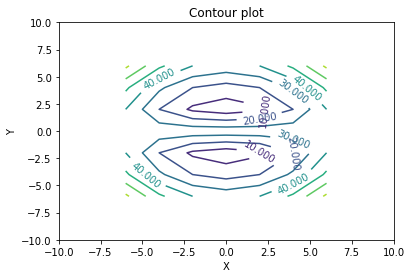

In [28]:
# Try to change ZPoints for understanding the changes in the chart
ZPoints[:][3] = [36,36,36,36,36,36,36]

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([-10,10])
pylab.ylim([-10,10])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints)

# Display z values on contour lines
plot.clabel(contours, inline=1, fontsize=10)

# Display the contour plot
plot.show()

#### Two Categorical Variables

A useful way to summarize two categorical variables is a **contingency table**, a table of counts by category.

In [29]:
pd.crosstab(fifa.Position, fifa['Preferred Foot']).head()

Preferred Foot,Left,Right
Position,,
CAM,256,702
CB,341,1437
CDM,126,822
CF,18,56
CM,249,1145


In [30]:
pd.crosstab(fifa.Position, fifa['Preferred Foot'], normalize='index').head()

Preferred Foot,Left,Right
Position,,
CAM,0.267223,0.732777
CB,0.191789,0.808211
CDM,0.132911,0.867089
CF,0.243243,0.756757
CM,0.178623,0.821377


#### Categorical and Numeric Data

Boxplots are a simple way to visually compare *the distributions of a numeric variable grouped according to a categorical variable*.

In the following chart we compare the distribution of overall scoring grouped according to the football player's position.

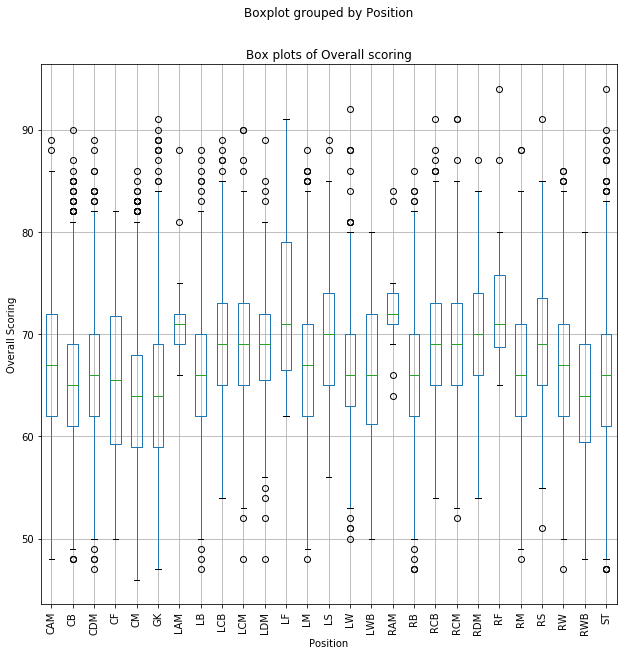

In [31]:
fifa_filter = fifa.loc[:,['Name', 'Age', 'Nationality', 'Position',
                          'Overall', 'Value', 'Wage', 'SprintSpeed', 'Acceleration']]

fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
fifa_filter[['Overall','Position']].boxplot(by = 'Position', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of Overall scoring') # Give the plot a main title
ax.set_xlabel('Position') # Set text for the x axis
ax.set_ylabel('Overall Scoring')# Set text for y axis
plt.xticks(rotation='vertical')
plt.show()

It is possible to notice that RAM is the position with the median overall scoring highest.

A **violin plot** is an enhancement to the boxplot, and plots **the density estimate on the y-axis**. <br>
The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. 
<br>
The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot, as it shows the probability density of the data at different values, usually smoothed by a kernel density estimator.

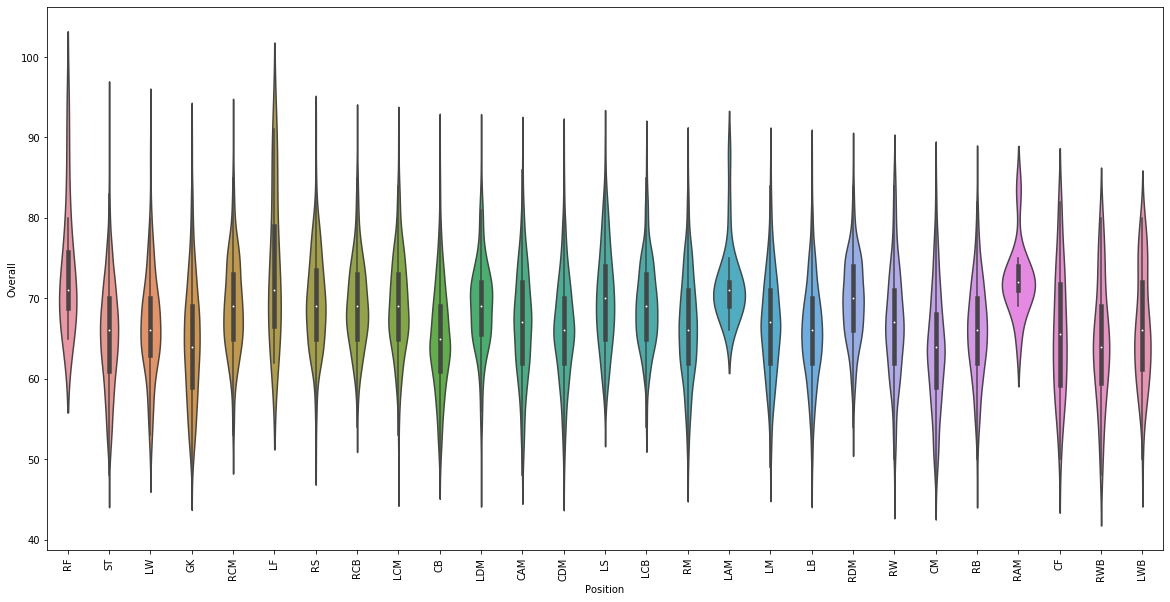

In [32]:
import seaborn as sns

fig, ax = plt.subplots(figsize =(20, 10)) 
sns.violinplot(ax = ax, x = fifa_filter['Position'], y=fifa_filter['Overall'] ) 
plt.xticks(rotation='vertical')
plt.show()

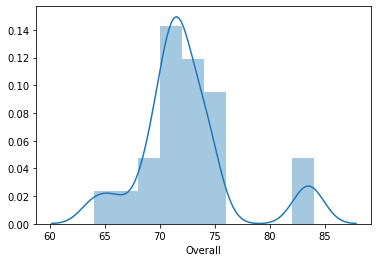

In [33]:
subsample = fifa_filter.loc[fifa_filter['Position']=='RAM', 'Overall']
plt = sns.distplot(subsample, bins=10, kde = True)

#### Visualizing Multiple Variables

The types of charts used to compare two variables —scatterplots, hexagonal binning, and boxplots— are readily extended to more variables through the notion of *conditioning*. <br>


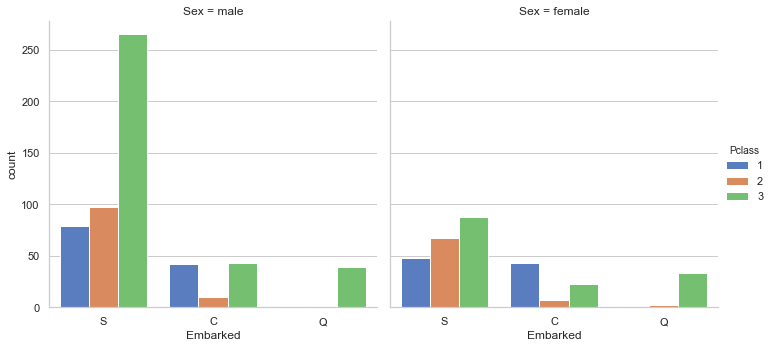

In [34]:
# Draw a nested barplot to show embarked for class and sex
sns.set(style="whitegrid")

g = sns.catplot(x="Embarked", hue="Pclass", col="Sex", kind="count", data=df, palette="muted")

Real world datasets often have tens of features, if not more. Sparse datasets can have tens of thousands of features. What are your visualization options if when you have a dataset with more than three dimensions?

#### Parallel Coordinates

Parallel coordinate plots are similar to scatter plots in that each axis maps to the ordered, numeric domain of a feature. But instead of having axes aligned in an orthogonal manner, parallel coordinates get their name due to their axes being arranged vertically and in parallel. All that is just a fancy way of saying parallel coordinates are a bunch of parallel, labeled, numeric axes.

Each graphed observation is plotted as a polyline, a series of connected line segments. The joints of the polyline fall on each axis. Since each axis maps to the domain of a numeric feature, the resulting polyline fully describes the value of each of the observation's features.

They are a higher dimensionality visualization technique because they allow you to easily view observations with more than three dimensions simply by tacking on additional parallel coordinates. However at some point, it becomes hard to comprehend the chart anymore due to the sheer number of axes and also potentially due to the number of observations. If you data has more than 10 features, parallel coordinates might not do it for you.

Parallel coordinates are useful because polylines belonging to similar records tend to cluster together. To graph them with Pandas and MatPlotLib, you have to specify a feature to group by (it can be non-numeric). This results in each distinct value of that feature being assigned a unique color when charted. Here's an example of parallel coordinates using SciKit-Learn's Iris dataset:

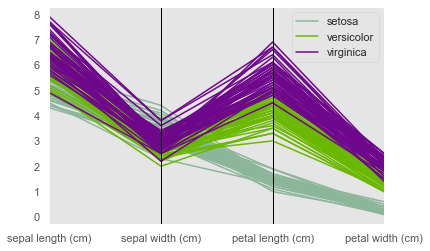

In [35]:
from sklearn.datasets import load_iris
from pandas.plotting import parallel_coordinates

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Look pretty...
matplotlib.style.use('ggplot')
# If the above line throws an error, use plt.style.use('ggplot') instead

# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 

df['target_names'] = [data.target_names[i] for i in data.target]

# Parallel Coordinates Start Here:
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

Pandas' parallel coordinates interface is extremely easy to use, but use it with care. It only supports a single scale for all your axes. If you have some features that are on a small scale and others on a large scale, you'll have to deal with a compressed plot. For now, your only three options are to:
- Normalize your features before charting them
- Change the scale to a log scale
- Or create separate, multiple parallel coordinate charts. Each one only plotting features with similar domains scales plotted

[Come back to index](#index-pract-stats)

## ---- __Exercise__ ----

Exploring the boston price house data using the chart showed above (for every column):

In [36]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Data and Sampling Distribution

Even in a big data project, predictive models are typically developed and piloted with samples. <br>

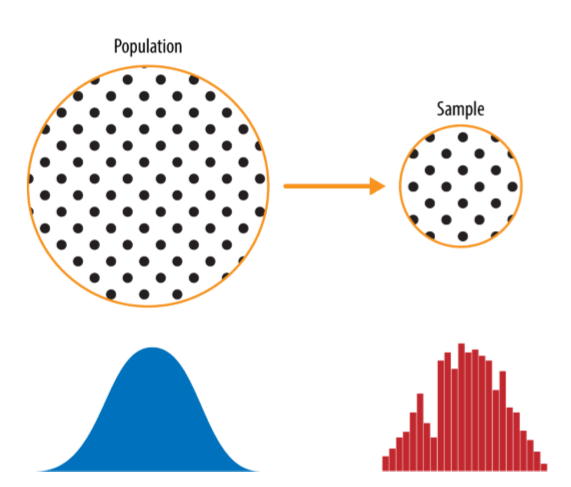

The lefthand side represents a population that, in statistics, is assumed to follow an underlying but unknown distribution. <br> The only thing available is the sample data and its empirical distribution, shown on the righthand side. <br>
To get from the lefthand side to the righthand side, a sampling procedure is used (represented by an arrow). <br>
Traditional statistics focused very much on the lefthand side, using theory based on strong assumptions about the population. Modern statistics has moved to the righthand side, where such assumptions are not needed.


<a id='rand_samp'></a>
#### RANDOM SAMPLING AND SAMPLE BIAS

A **sample** is a subset of data from a larger data set; statisticians call this larger data set the **population**. <br>
**Random sampling** _is a process in which each available member of the population being sampled has an equal chance of being chosen for the sample at each draw_. The sample that results is called a **simple random sample**.<br>
__Sampling__ can be done **with replacement**, _in which observations are put back in the population after each draw for possible future reselection_. Or it can be done **without replacement**, _in which case observations, once selected, are unavailable for future draws_. <br><br>

The __sample bias__ is a sample different in some _meaningful nonrandom_ way from the larger population that it is meant to represent. <br>
The term nonrandom is important, hardly any sample, including random samples, will be exactly representative of the population. **Sample bias occurs when the difference is meaningful, and can be expected to continue for other samples drawn in the same way as the first.**


[Come back to index](#index-pract-stats)

<a id='bias'></a>
#### BIAS

_Statistical bias refers to measurement or sampling errors that are systematic and produced by the measurement or sampling process._ <br>
An important distinction should be made between **errors due to random chance**, and **errors due to bias**. Consider the physical process of a gun shooting at a target. It will not hit the absolute center of the target every time, or even much at all. <br>
**An unbiased process will produce error, but it is random and does not tend strongly in any direction**. 

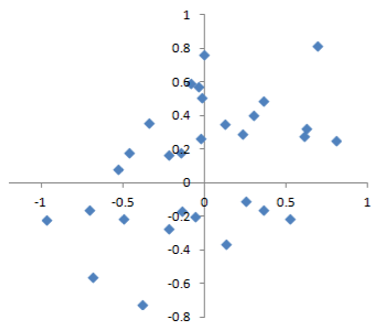

The results shown in the figure below, show a biased process—there is still random error in both the x and y direction, but there is also a **bias**. 

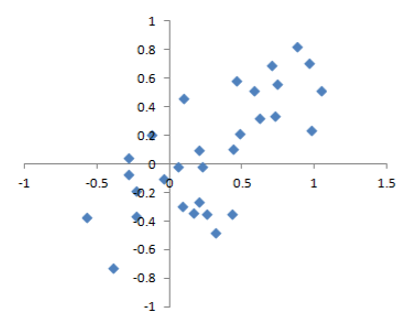

Shots tend to fall in the upper-right quadrant.

<a id='rand_sel'></a>
#### RANDOM SELECTION

There are now a variety of methods to achieve representativeness, but at the heart of all of them lies **random sampling**. <br>
Random sampling is not always easy. Proper definition of an accessible population is key. <br>
Suppose we want to generate a representative profile of customers and we need to conduct a pilot customer survey. The survey needs to be representative but is labor intensive. <br>
First we need to define who a customer is:
    - We might select all customer records where purchase amount > 0. 
    - Do we include all past customers? 
    - Do we include refunds? Internal test purchases? 
    - Resellers? 
    - Both billing agent and customer? <br>
Next we need to specify a sampling procedure. 
    - It might be “select 100 customers at random.” 
Where a sampling from a flow is involved (e.g., real-time customer transactions or web visitors), timing considerations may be important (e.g., a web visitor at 10 a.m. on a weekday may be different from a web visitor at 10 p.m. on a weekend). 
<br>
<br>
In **stratified sampling**, _the population is divided up into strata, and random samples are taken from each stratum._ <br>
Political pollsters might seek to learn the electoral preferences of whites, blacks, and Hispanics. A simple random sample taken from the population would yield too few blacks and Hispanics, so those strata could be overweighted in stratified sampling to yield equivalent sample sizes. 

Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would be prohibitively expensive.

Some examples about random sampling and stratified sampling in python:

<a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html'>Random Sampling with Pandas</a>

In [37]:
df = pd.read_csv("train.csv")
print("Dataset's shape:", df.shape)

Dataset's shape: (891, 12)


In [38]:
print("-------------------------")
print("Random sampling without replacement")
df_rand_samp1 = df.sample(n=300, replace = False)
print("# of unique rows in the sample:", len(df_rand_samp1.PassengerId.unique()))

print("-------------------------")
print("Random sampling with replacement")
df_rand_samp2 = df.sample(n=300, replace=True)
print("# of unique rows in the sample:", len(df_rand_samp2.PassengerId.unique()))

-------------------------
Random sampling without replacement
# of unique rows in the sample: 300
-------------------------
Random sampling with replacement
# of unique rows in the sample: 249


In [39]:
print("Embarked value distribution from dataset")
df.Embarked.value_counts(normalize=True)

Embarked value distribution from dataset


S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [40]:
print("Embarked value distribution from sample without replacement")
df_rand_samp1.Embarked.value_counts(normalize=True)

Embarked value distribution from sample without replacement


S    0.703333
C    0.210000
Q    0.086667
Name: Embarked, dtype: float64

In [41]:
print("Embarked value distribution from sample with replacement")
df_rand_samp2.Embarked.value_counts(normalize=True)

Embarked value distribution from sample with replacement


S    0.705686
C    0.200669
Q    0.093645
Name: Embarked, dtype: float64

<a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit.split'>Stratified Sampling</a> <br>

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
training_data = df.loc[:, ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
label_data = df.loc[:,'Survived']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

split_train_test = sss.split(training_data, label_data)

# Method to use for generator results in python
train, test = next(split_train_test)

train_dataset = training_data.loc[train, :]
test_dataset = training_data.loc[test, :]


<a href='https://www.programiz.com/python-programming/generator'>More Info about generator</a>

In [43]:
train_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
836,837,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S
129,130,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
298,299,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
337,338,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
255,256,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


In [44]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
620,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C
208,209,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
47,48,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q


In [45]:
train_dataset.Embarked.value_counts(normalize=True)

S    0.734234
C    0.186937
Q    0.078829
Name: Embarked, dtype: float64

In [46]:
test_dataset.Embarked.value_counts(normalize=True)

S    0.714607
C    0.191011
Q    0.094382
Name: Embarked, dtype: float64

[Come back to index](#index-pract-stats)

<a id='sel_bias'></a>
#### SELECTION BIAS - *“If you torture the data long enough, sooner or later it will confess"*

**Selection bias** _refers to the practice of selectively choosing data — consciously or unconsciously — in a way that leads to a conclusion that is misleading or ephemeral_. <br>
- **Bias**: systematic error <br>
- **Data snooping**: extensive hunting through data in search of something interesting <br>
- **Vast search effect**: bias or nonreproducibility resulting from repeated data modeling, or modeling data with large numbers of predictor variables.

If you specify a hypothesis and conduct a well-designed experiment to test it, you can have high confidence in the conclusion. <br>
Often, one looks at available data and tries to discern patterns. But is the pattern for real, or just the product of **data snooping** ( _that is, extensive hunting through the data until something interesting emerges_ )? 

A form of selection bias of particular concern to data scientists is what John Elder calls the **vast search effect**. <br> If you repeatedly run different models and ask different questions with a large data set, you are bound to find something interesting. Is the result you found truly something interesting, or is it the chance outlier? <br>
We can guard against this by using a holdout set, and sometimes more than one holdout set, against which to validate performance. Elder also advocates the use of what he calls **target shuffling** (a permutation test) to test the validity of predictive associations that a data mining model suggests. <br>
**Typical forms of selection bias** are:
- **Vast search effect**
- **Nonrandom sampling**
- **Cherry-picking data**: is the act of pointing to individual cases or data that seem to confirm a particular position while ignoring a significant portion of related cases or data that may contradict that position
- **Selection of time intervals** that accentuate a partiular statistical effect
- **Stopping an experiment** when the results look “interesting"

<a id='samp_distr'></a>
#### SAMPLING DISTRIBUTION OF A STATISTIC

The term **sampling distribution** _of a statistic refers to the distribution of some sample statistic, over many samples drawn from the same population_. <br>
- **Sample statistic**: a metric calculated for a sample of data drawn from a larger population <br>
- **Data distribution**: the frequency distribution of individual values in a data set <br>
- **Sampling distribution**: the frequency distribution of a sample statistic over many samples or resamples <br>
- **Central limit theorem**: the tendency of the sampling distribution to take on a normal shape as sample size rises <br>
- **Standard error**: the variability (standard deviation) of a sample statistic over many samples (not to be confused with standard deviation, which, by itself, refers to variability of individual data values)

Typically, a sample is drawn with the goal of measuring something (with a sample statistic) or modeling something (with a statistical or machine learning model). <br>
Since our estimate or model is based on a sample, it might be in error; and it might be different if we were to draw a different sample. We are therefore interested in how different it might be, or in other words, how it is its **sampling variability**. <br>
The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself. The larger the sample that the statistic is based on, the more this is true. Also, the larger the sample, the narrower the distribution of the sample statistic.

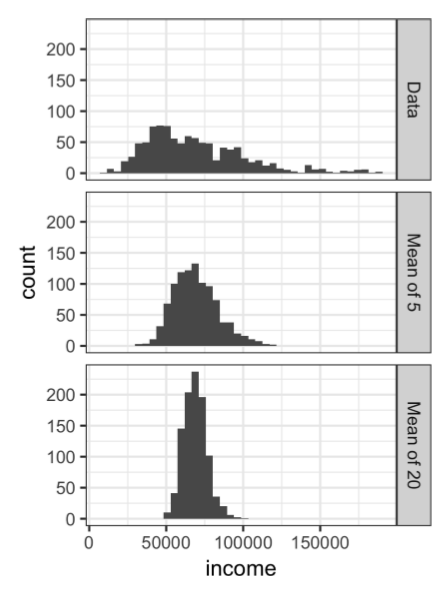
In the above figure we have plotted tre histograms taking three samples from a population data: a sample of 1,000 values, a sample of 1,000 means of 5 values, and a sample of 1,000 means of 20 values. <br>
The histogram of the individual data values is broadly spread out and skewed toward higher values; the histograms of the means of 5 and 20 are increasingly compact and more bell-shaped. <br>
This phenomenon is termed the __central limit theorem__; and it says that *the means drawn from multiple samples will resemble the familiar bell-shaped normal curve even if the source population is not normally distributed*, provided that the sample size is large enough and the distance of the data from normality is not too great. <br>
The __standard error__ *is a single metric that sums up the variability in the sampling distribution for a statistic*. <br>
The standard error can be estimated using a statistic based on the standard deviation s of the sample values, and the sample size n: 

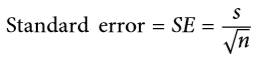
As the sample size increases, the standard error decreases. <br>
The relationship between standard error and sample size is sometimes referred to as the **square-root of n rule**: _in order to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4_. <br>
Consider the following approach to measure standard error: <br>
1. Collect a number of brand new samples from the population. <br>
2. For each new sample, calculate the statistic (e.g., mean). <br>
3. Calculate the standard deviation of the statistics computed in step 2; use this as your estimate of standard error.

Fortunately,  it is not necessary to draw brand new samples; instead, you can use __bootstrap resample__.
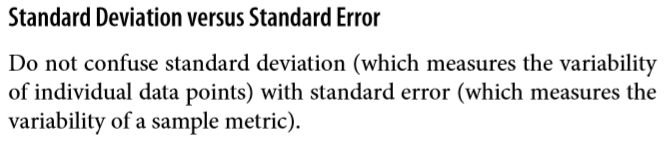

<a id='boot'></a>
#### THE BOOTSTRAP

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to _draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample_. <br>
This procedure is called the **bootstrap**, and it does not necessarily involve any assumptions about the data or the sample statistic being normally distributed. <br>
- **Bootstrap sample**: a sample taken with replacement from an observed dataset. <br>
- **Resampling**: the process of taking repeated samples from observed data; includes both bootstrap and permutation (shuffling) procedures

The algorithm for a bootstrap resampling of the mean is as follows, for a sample of size n:<br>
1. Draw a sample value, record, replace it. <br>
2. Repeat n times. <br>
3. Record the mean of the n resampled values. <br>
4. Repeat steps 1–3 R times. <br>
5. Use the R results to: <br>
    a. Calculate their standard deviation (this estimates sample mean standard error). <br>
    b. Produce a histogram or boxplot. <br>
    c. Find a confidence interval. 

The more iterations you do, the more accurate the estimate of the standard error, or the confidence interval. The result from this procedure is a bootstrap set of sample statistics or estimated model parameters, which you can then examine to see how variable they are. <br>
The term __resampling__ *includes permutation procedures, where multiple samples are combined and the sampling may be done without replacement*. In any case, the term __bootstrap__ *always implies sampling with replacement from an observed data set*.

[Come back to index](#index-pract-stats)

<a id='conf_int'></a>
#### CONFIDENCE INTERVALS

Frequency tables, histograms, boxplots, and standard errors are all ways to understand the potential error in a sample estimate. Confidence intervals are another. <br>
- **Confidence level**: the percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest <br>
- **Interval endpoints**: the top and bottom of the confidence interval

Confidence intervals always come with a coverage level, expressed as a (high) percentage. **An x% confidence interval around a sample estimate should, on average, contain similar sample estimates x% of the time (when a similar sampling procedure is followed)**. <br>
Given a sample of size n, and a sample statistic of interest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data (a resample). <br>
2. Record the statistic of interest for the resample. <br>
3. Repeat steps 1–2 many (R) times.<br>
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution. <br>
5. The trim points are the endpoints of an x% bootstrap confidence interval. <br>

The percentage associated with the confidence interval is termed the __level of confidence__. <br>
_The higher the level of confidence, the wider the interval. Also, the smaller the sample, the wider the interval (i.e., the more uncertainty)_. Both make sense: the more confident you want to be, and the less data you have, the wider you must make the confidence interval to be sufficiently assured of capturing the true value.

Some examples about bootstraping and confidence interval in python:

In [47]:
# scikit-learn bootstrap
from sklearn.utils import resample
# for info about library resample --> https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

# data sample
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
print("Sample: %s" % data)

# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4)

print('Bootstrap Sample: %s' % boot)

# out of bag observations
oob = [x for x in data if x not in boot]
print('OOB Sample: %s' % oob)

Sample: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
Bootstrap Sample: [0.4, 0.3, 0.1, 0.3]
OOB Sample: [0.2, 0.5, 0.6]


For more details about bootstrap <a href='https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/'>click here</a>

In [48]:
statistics = []
for i in range(100):
    sample = resample(df.Fare, replace=True, n_samples=400)
    stat = sample.mean()
    statistics.append(stat)

df_statistics = pd.DataFrame(statistics, columns=['Sample_Statistics'])
print("Mean of statistics boostraping samples:", df_statistics.mean())

alpha = 0.95
ordered = df_statistics.sort_values(by='Sample_Statistics')
ordered = ordered.reset_index(drop=True)
lower = ordered.loc[round((1-alpha)/2*100),'Sample_Statistics']
upper = ordered.loc[round((alpha+((1-alpha)/2))*100),'Sample_Statistics']

print("With a ", alpha*100, "% of confidence interval, the Fare's mean is between", round(lower,2), "and", round(upper,2))
print("---------------------------------")
print("Mean of statistics population", round(df.Fare.mean(),2))

Mean of statistics boostraping samples: Sample_Statistics    32.706732
dtype: float64
With a  95.0 % of confidence interval, the Fare's mean is between 27.87 and 39.86
---------------------------------
Mean of statistics population 32.2


--------------------------------- __Exercise__ ---------------------------------

*Complete the sentence*:
<br>
With a 80% of confidence level, it is possible to say that the Age's mean of Boston dataset is between ___ and __ . <br>
Try different input type for computing this statistics:

1) Create 50 sample with 100 elements and compute confidence level:

1) Create 100 sample with 300 elements and compute confidence level:

What difference you see about the two results?

<a id='norm_dist'></a>
#### NORMAL DISTRIBUTION

In a normal distribution, 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.
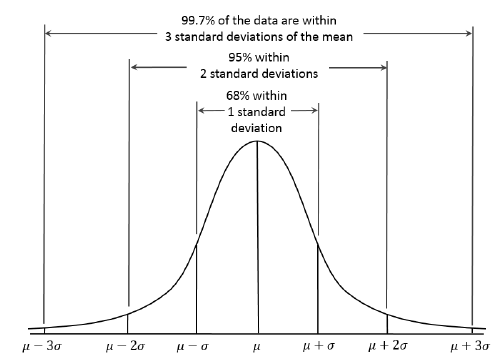
The utility of the normal distribution derives from the fact that many
statistics are normally distributed in their sampling distribution.
Even so, assumptions of normality are generally a last resort, used
when empirical probability distributions, or bootstrap distributions,
are not available.

A **standard normal distribution** is one in which the units on the x-axis are expressed in terms of standard deviations away from the mean. <br>
To compare data to a standard normal distribution, you subtract the mean then divide by the standard deviation; this is also called _normalization_ or _standardization_. <br>
The _transformed value_ is termed a **z-score**, and the normal distribution is sometimes called the _z-distribution_.

A **QQ-Plot** is used to visually determine how close a sample is to the normal distribution. <br>
The QQ-Plot orders the z-scores from low to high, and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away of the data from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.
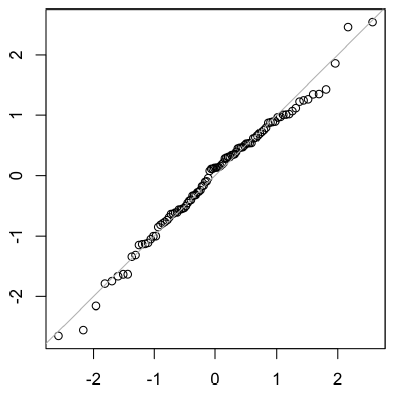
Converting data to z-scores (i.e., standardizing or normalizing the
data) does not make the data normally distributed. It just puts the
data on the same scale as the standard normal distribution, often
for comparison purposes.


For more information about Normal Distribution: <br>
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm <br>
- https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

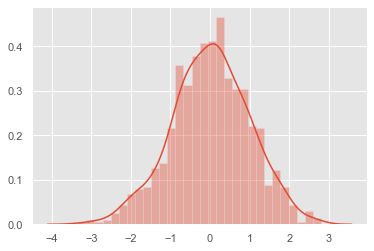

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

# generate random number with mean 0 and standard deviation 1
s = pd.DataFrame(norm.rvs(size = 1000), columns=['Value'])

chart = sns.distplot(s, bins=30, kde = True)

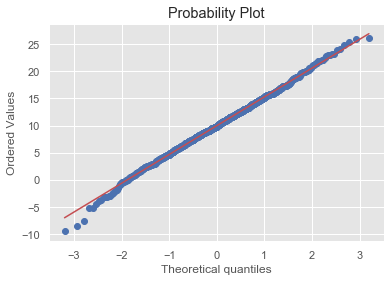

In [50]:
import scipy.stats as st

# generate random number with mean 10 and standard deviation 5
s = norm.rvs(loc=10, scale=5, size = 1000)

res = st.probplot(s, plot=plt)

In [51]:
# using cdf Cumulative distribution function.
print("Cumulative probability to +1 std in a Standard Normal Distribution:", round(norm.cdf(1),2)*100, "%") 
print("Cumulative probability to +0 std in a Standard Normal Distribution:", round(norm.cdf(0),2)*100, "%")

# using ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)
print("Z-Score at 50% in a Standard Normal Distribution:", round(norm.ppf(0.50),2))
print("Z-Score at 2.5% in a Standard Normal Distribution:", round(norm.ppf(0.025),2))


Cumulative probability to +1 std in a Standard Normal Distribution: 84.0 %
Cumulative probability to +0 std in a Standard Normal Distribution: 50.0 %
Z-Score at 50% in a Standard Normal Distribution: 0.0
Z-Score at 2.5% in a Standard Normal Distribution: -1.96


--------------------------------- __Exercise__ ---------------------------------

_What is the probability to has a result from a Standard Normal Distribution far away from 2 standard deviation?_

_What is the Z-Score of a Standard Normal Distribution for 0.5% of probability?_

[Come back to index](#index-pract-stats)

<a id='longT_dist'></a>
#### LONG-TAILED DISTRIBUTIONS

Despite the importance of the normal distribution historically in statistics, and in contrast to what the name would suggest, data is generally not normally distributed. <br>
- **Tail**: the long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency <br>
- **Skew**: where one tail of a distribution is longer than the other

**While the normal distribution is often appropriate and useful with respect to the distribution of errors and sample statistics, it typically does not characterize the distribution of raw data.** <br>
Sometimes, the distribution is _highly skewed_ (**asymmetric**), such as
with income data, or the distribution can be discrete, as with binomial data. Both symmetric and asymmetric distributions may have long tails. <br>
The tails of a distribution correspond to the extreme values (small and large).


A good example to illustrate the long-tailed nature of data is stock returns.
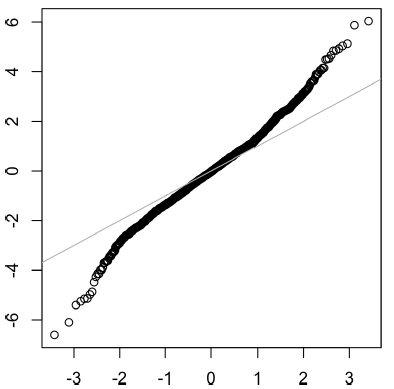
In this case the points are far below the line for low values and far
above the line for high values. <br>
_This means that we are much more likely to observe extreme values than would be expected if the data had a normal distribution._

The **t-distribution** _is a normally shaped distribution, but a bit thicker and longer on the tails_. <br>
Distributions of sample means are typically shaped like a t-distribution, and there is a family of t-distributions that differ depending on how large the sample is. <br>
The larger the sample, the more normally shaped the t-distribution becomes. <br>
_A number of different statistics can be compared, after standardization, to the t-distribution, to estimate confidence intervals in light of sampling variation_. <br>
Consider a sample of size _n for which the sample mean x_ has been calculated. If _s_ is the sample standard deviation, a 90% confidence interval around the sample mean is given by:
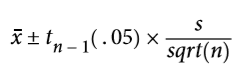

where t(n−1)(.05) is the value of the t-statistic, with (n – 1) degrees of freedom, that “chops off” 5% of the t-distribution at either end. <br>
The t-distribution’s accuracy in depicting the behavior of a sample statistic requires that the distribution of that statistic for that sample be shaped like a normal distribution. It turns out that sample statistics are often normally distributed, even when the underlying population data is not. <br>
For more info about t-distributions in python, <a href='https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html'>click here</a>.

Yes/no (binomial) outcomes lie at the heart of analytics since they are often the culmination of a decision or other process; buy/don’t buy, click/don’t click, survive/die, and so on. Central to understanding the **binomial distribution** is the idea of a set of _trials_, each trial having two possible outcomes with definite probabilities. <br>
The binomial distribution is the frequency distribution of the **number of successes** (x) in a given **number of trials** (n) with **specified probability (p) of success in each trial**. There is a family of binomial distributions, depending on the values of x, n, and p_. <br>
The binomial distribution would answer a question like: _If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?_

In [52]:
from scipy.stats import binom 

x = 0
n = 200
p = 0.02

ans = binom.cdf(x, n, p)
print("Answer:", round(ans, 6))

Answer: 0.017588


<a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html'>Click here</a> for more info about binomial distribution.

The mean of a binomial distribution is n× p; you can also think of this as the expected number of successes in n trials, for success probability = p. <br>
The variance is (n) × (p) (1− p). With a large enough number of trials (particularly when p is close to 0.50), the binomial distribution is virtually indistinguishable from the normal distribution.

<a id='poiss_dist'></a>
#### POISSON AND RELATED DISTRIBUTIONS

Many processes produce events randomly at a given overall rate. <br>
The **Poisson distribution** _tells us the distribution of events per
unit of time or space when we sample many such units_. <br>
This distribution is useful when we asking questions as the following: <br> “_How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any 5-second period_?"<br>
The key parameter in a Poisson distribution is **λ**, or lambda. _This is the mean number of events that occurs in a specified interval of time or space._ <br> The variance for a Poisson distribution is also λ.

Using the same parameter λ that we used in the Poisson distribution, we can also model _the distribution of the time between events_ for example time between visits to a website.

_A key assumption_ in any simulation study for either the Poisson or exponential distribution _is that the rate, **λ**, remains constant over the period being considered_. <br>
This is rarely reasonable in a global sense; for example, traffic on roads or data networks varies by time of day and day of week. However, the time periods, or areas of space, can usually be divided into segments that are sufficiently homogeneous so that analysis or simulation within those periods is valid.

In many cases, the event rate does not remain constant over time. If the period over which it changes is much longer than the typical interval between events, you just subdivide the analysis into the segments where rates are relatively constant, as mentioned before. <br>
If, however, the event rate changes over the time of the interval, the exponential (or Poisson) distributions are no longer useful. <br>
The **Weibull distribution** is an extension of the exponential distribution, in which _the event rate is allowed to change, as specified by a shape parameter, β_. <br>
If β > 1, the probability of an event increases over time, if β < 1, it decreases.

[Come back to index](#index-pract-stats)

### Statistical Experiments and Significance Testing

The classical statistical inference process starts with a **hypothesis** (for example, drug A is better than the existing standard drug?) <br>
An __experiment is designed__ to test the hypothesis; the __data is collected__ and analyzed, and then a conclusion is drawn. <br>
The term **inference** reflects the intention to apply the experiment results, which involve a limited set of data, to a larger process or population.
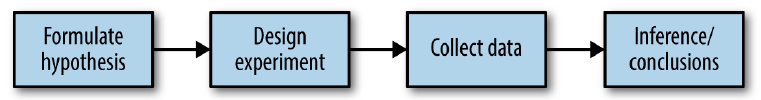

<a id='a_b_test'></a>
#### A/B TESTING

An A/B test is an experiment with two groups to establish which of two treatments, products or procedures is superior. <br>
Often one of the two treatments is the _standard existing treatment_; if a standard treatment is used, it is called the **control**. <br>
A typical hypothesis is that treatment is better than control (the standard treatment).<br>
Some examples of A/B testing include: <br>
- Testing two therapies to determine which suppresses cancer more effectively
- Testing two prices to determine which yields more net profit
- Testing two web headlines to determine which produces more clicks
- Testing two web ads to determine which generates more conversions

A proper A/B test has subjects that can be assigned to one treatment or another; subjects are randomized (assigned randomly) to treatments. <br>
In this way, you know that any difference between the treatment groups is
due to one of two things: <br>
- The effect of the different treatments
- (The chance) Luck of the draw in which subjects are assigned to which treatments. For example, the random assignment may have resulted in the naturally better-performing subjects being concentrated in A or B.

Without a **control group**, there is no assurance that “other things are equal” and that any difference is really due to the treatment (or to chance). When you have a control group, it is subject to the same conditions (except for the treatment of interest) as the treatment group. <br>
If the experiment is expected to lead to a decision between treatment A and treatment B, a single metric, or test statistic, needs to be established beforehand.

[Come back to index](#index-pract-stats)

<a id='hp_test'></a>
#### HYPOTHESIS TESTS

An A/B test is typically constructed with a hypothesis in mind. <br>
The human mind tend to understimate the scope of natural random behaviour. <br>
One manifestation of this is the failure to anticipate extreme events, or so-called “black swans”. Another manifestation is the tendency to misinterpret random events as having patterns of some significance. <br>
In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either: <br>
- Random chance in assignment of subjects
- A true difference between A and B

A **statistical hypothesis test** is an analysis to assess whether random chance is a reasonable explanation for the observed difference between groups A and B. <br>
Hypothesis tests use the following logic:<br>
<br>
“ _Given the human tendency to react to unusual but random behavior and interpret it as something meaningful and real, in our experiments **we will require proof that the difference between groups is more extreme than what chance might reasonably produce**_.” <br>
<br>
This involves a **baseline assumption** _that the treatments are equivalent, and any difference between the groups is due to chance_. This baseline assumption is termed the **null hypothesis**.  <br>
Our hope is that we can, in fact, _prove the null hypothesis's wrong_, and _show that the outcomes for groups A and B are more different than what chance might produce_.
<br>
<br>
Hypothesis tests by their nature involve not just a null hypothesis, but also an offsetting alternative hypothesis. Here are some examples: <br>
- Null = “no difference between the means of group A and group B,” alternative = “A is different from B” (could be bigger or smaller)
- Null = “A ≤ B,” alternative = “A > B”
- Null = “B is not X% greater than A,” alternative = “B is X% greater than A”

<br>
Taken together, the null and alternative hypotheses must account for all possibilities.

The nature of the null hypothesis determines the structure of the hypothesis test. <br>
If you want a directional alternative hypothesis (*B is better than A*) you use a __one-way (or one-tail) hypothesis test__. <br>
If you want a hypothesis test to protect you from being fooled by chance in either direction, **the alternative hypothesis is bidirectional** (_A is different from B; could be bigger or smaller_). In such a case, you use a __two-way (or two-tail) hypothesis__ .

<a id='resamp'></a>
#### RESAMPLING

**Resampling** _in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic_. <br>
There are two main types of resampling procedures:<br>
- The **bootstrap** : is used to assess the reliability of an estimate;
- The **permutation** : are used to test hypotheses, typically involving two or more groups.

In a _permutation procedure_, two or more samples are involved, typically the groups in an A/B or other hypothesis test. <br>
**Permute means to change the order of a set of values**. <br>
The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C, D, …) together. <br>
We then test that hypothesis by randomly drawing groups from this combined set, and seeing how much they differ from one another. <br>
The permutation procedure is as follows:
1. Combine the results from the different groups in a single data set.
2. Shuffle the combined data, then randomly draw (without replacing) a resample of the same size as group A.
3. From the remaining data, randomly draw (without replacing) a resample of the same size as group B.
4. Do the same for groups C, D, and so on.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
6. Repeat the previous steps R times to yield a permutation distribution of the test statistic.


Now go back to the observed difference between groups and compare it to the set of permuted differences. <br> 
_If the observed difference lies well within the set of permuted differences, then we have not proven anything—the observed difference is within the range of what chance might produce_. <br>
However, _if the observed difference lies outside most of the permutation distribution, then we conclude that chance is not responsible_. <br>
In technical terms, _the difference is **statistically significant**_.

**Example**: let's consider the dataset of the titanic we used just above. <br>
We compute the mean age's  difference between men and women, and then we asked if the difference is within the range of what random chance might
produce, or, alternatively, is statistically significant.

In [53]:
# Compute mean age for men
mean_age_m = round(df.loc[df.Sex == 'male', :].Age.mean(),1)
print("Mean Men age:", mean_age_m)

# Compute mean age for women
mean_age_f = round(df.loc[df.Sex == 'female', :].Age.mean(),1)
print("Mean Women age:", mean_age_f)

print("Delta mean age:", round(mean_age_m - mean_age_f,2))

Mean Men age: 30.7
Mean Women age: 27.9
Delta mean age: 2.8


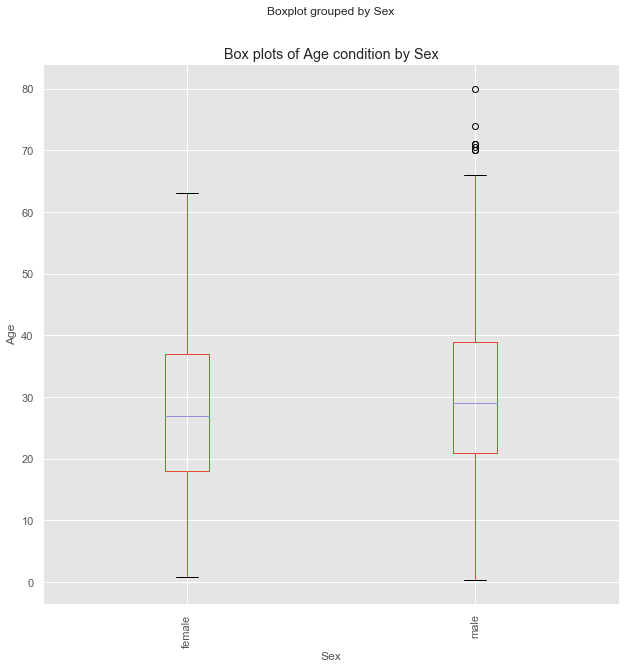

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

tit = df.loc[:,['Sex', 'Age']]

fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
tit[['Sex','Age']].boxplot(by = 'Sex', ax = ax) # Use the plot.bar method on the new data frame
ax.set_title('Box plots of Age condition by Sex') # Give the plot a main title
ax.set_xlabel('Sex') # Set text for the x axis
ax.set_ylabel('Age')# Set text for y axis
plt.xticks(rotation='vertical')
plt.show()

The question is whether this difference is within the range of what random chance might produce, or, alternatively, is statistically significant. One way to answer this is to apply a permutation test.

In [55]:
import random as rd

n_male = df.loc[df.Sex=='male', 'Age'].count()
n_female = df.loc[df.Sex=='female', 'Age'].count()

print("Number of Male in the Age field:", n_male)
print("Number of Female in the Age field:", n_female)

def perm_fun(data, n1, n2):
    n = n1 + n2
    list_n = range(n)
    idx1 = rd.sample(list_n, n1)
    idx2 = list(set(list_n)-set(idx1))
    mean_1 = data.iloc[idx1].mean()
    mean_2 = data.iloc[idx2].mean()
    delta_mean = mean_1 - mean_2
    
    return round(delta_mean, 2)

list_mean = []

for i in range(1000):
    list_mean.append(perm_fun(df.Age, n_male, n_female))
        

Number of Male in the Age field: 453
Number of Female in the Age field: 261


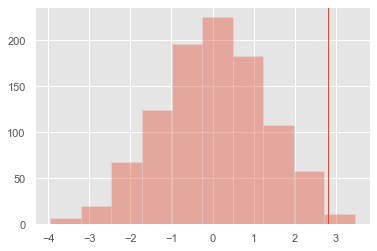

In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x = np.ones((5,), dtype=int)*2.8

sns.distplot(list_mean, bins=10, kde = False) 
sns.rugplot(x, 200)

The histogram shows that mean difference of random permutations rarely exceeds the observed difference in session times (the vertical line). <br>
This suggests that the observed difference in session time between Men and Women is outside the range of chance variation, thus is statistically significant.

[Come back to index](#index-pract-stats)

<a id='stat-sign'></a>
#### STATISTICAL SIGNIFICANCE AND P-VALUES

**Statistical significance** is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce.
As we done before, looking at the graph is not a very precise way to measure statistical significance. <br>
For a best understanding it is possible use the **p-value**, the frequency with which the chance model produces a result more extreme than the observed result. <br>
It is possible **estimate a pvalue** from our permutation test by _taking the proportion of times that the permutation test produces a difference equal to or greater than the observed difference_:

In [57]:
# Delta observed from the experiment
delta_observed = round(mean_age_m - mean_age_f,2)

# Mean's from samples
delta_mean_samples = pd.DataFrame(list_mean, columns=['Mean_Samples'])

# Cases where delta_mean_samples are bigger than delta_observed
check = delta_mean_samples.Mean_Samples>delta_observed
pvalue = check.mean()

print("We would expect to achieve a result as extreme as that we observed, or more extreme, by random chance over", round(pvalue*100,2), "% of the time")

We would expect to achieve a result as extreme as that we observed, or more extreme, by random chance over 0.8 % of the time


A threshold is specified in advance, as in “more extreme than 5% of the chance (null hypothesis) results”; this threshold is known as **alpha**. <br>
In assessing statistical significance, two types of error are possible:
- **Type 1 error**: in which you mistakenly conclude an effect is real, when it is really just due to chance;
- **Type 2 error**: in which you mistakenly conclude that an effect is not real (i.e., due to chance), when it really is real. <br>
<br>
Actually, a Type 2 error is a judgment that the sample size is too small to detect the effect.

For a data scientist, a p-value is a useful metric in situations where you want to know whether a model result that appears interesting and useful is within the range of normal chance variability.

**n.b.**: a good approximation to the permutation (shuffled) distribution
was the t-test distribution. It is used for the very common two sample comparison — A/B test — in which the data is numeric. <br>
But in order for the t-distribution to be used without regard to scale, a standardized form of the test statistic must be used.

<a href='https://towardsdatascience.com/master-your-hypothesis-test-a-tutorial-on-power-bootstrapping-sample-selection-and-outcome-273d6739d3e5'>A useful link</a>

--------------------------------- __Exercise__ ---------------------------------

Use the given data on annual Tbills and 10 year bond returns to determine if Tbills and Bond10 returns have equal means. Use α=0.05. 

In [58]:
Returns = pd.read_csv("Returns.csv", sep=';', index_col=False, decimal=',')
Returns.head()

FileNotFoundError: [Errno 2] File b'Returns.csv' does not exist: b'Returns.csv'

<a id='degr-free'></a>
#### DEGREES OF FREEDOM

**Degrees of Freedom** is a concept applied to statistics calculated from sample data, and refers to the number of values free to vary. <br>
For understand this  concept I will do an example: <br>
_Imagine you’re a fun-loving person who loves to wear hats. You couldn't care less what a degree of freedom is. You believe that variety is the spice of life._ <br>
Unfortunately, you have constraints. You have only 7 hats. Yet you want to wear a different hat every day of the week. <br>
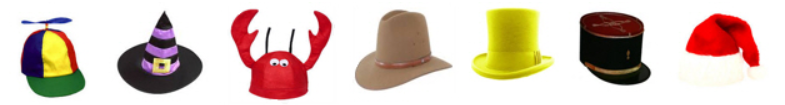
On the first day, you can wear any of the 7 hats. On the second day, you can choose from the 6 remaining hats, on day 3 you can choose from 5 hats, and so on. <br>
When day 6 rolls around, you still have a choice between 2 hats that you haven’t worn yet that week. But after you choose your hat for day 6, you have no choice for the hat that you wear on Day 7. You must wear the one remaining hat. <br>
_You had 7-1 = 6 days of “hat” freedom—in which the hat you wore could vary!_

**Degrees of freedom** _are often broadly defined as the number of "observations" (pieces of information) in the data that are free to vary when estimating statistical parameters_.

Suppose now you want to test the population mean with a sample of 10 values, using a 1-sample t test. You now have a constraint—the estimation of the mean. <br>
By definition of the mean, the following relationship must hold: *The sum of all values in the data must equal n x mean, where n is the number of values in the data set.*
<br> <br>
So if a data set has 10 values, the sum of the 10 values must equal the mean x 10. If the mean of the 10 values is 3.5 (you could pick any number), this constraint requires that the sum of the 10 values must equal 10 x 3.5 = 35.

With that constraint, the first value in the data set is free to vary. Whatever value it is, it’s still possible for the sum of all 10 numbers to have a value of 35. The second value is also free to vary, because whatever value you choose, it still allows for the possibility that the sum of all the values is 35. <br>
In fact, the first 9 values could be anything, including these two examples:<br>
34, -8.3, -37, -92, -1, 0, 1, -22, 99 <br>
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
<br>
But to have all 10 values sum to 35, and have a mean of 3.5, the 10th value cannot vary. It must be a specific number:
<br>
34, -8.3, -37, -92, -1, 0, 1, -22, 99  -----> 10TH value must be 61.3 <br>
0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ----> 10TH value must be 30.5
<br>
Therefore, you have 10 - 1 = 9 degrees of freedom. It doesn’t matter what sample size you use, or what mean value you use—the last value in the sample is not free to vary. <br>
You end up with n - 1 degrees of freedom, where n is the sample size.

[Come back to index](#index-pract-stats)

<a id='arm-bandit'></a>
#### MULTI-ARM BANDIT ALGORITHM

**Bandit algorithms** allow you to test multiple treatments at once and reach conclusions faster than traditional statistical designs.

Imagine a slot machine with more than one arm where each arm paying out at a different rate. <br>
Your goal is to win as much money as possible to identify and settle on the winning arm sooner rather than later. <br>
Suppose each “win” is for the same amount, no matter which arm. What differs is the probability of a win. Suppose further that you initially try each arm 50 times and get the following results: <br>
- Arm A: 10 wins out of 50 <br>
- Arm B: 2 win out of 50 <br>
- Arm C: 4 wins out of 50 <br>


One extreme approach is to say, “Looks like arm A is a winner—let’s quit trying the other arms and stick with A.” This takes full advantage of the information from the initial trial. If A is truly superior, we get the benefit of that early on. On the other hand, if B or C is truly better, we lose any opportunity to discover that. Another extreme approach is to say, “This all looks to be within the realm of chance—let’s keep pulling them all equally.” This gives maximum opportunity for alternates to A to show themselves. However, in the process, we are deploying what seem to be inferior treatments. How long do we permit that? <br>
**Bandit algorithms** _take a hybrid approach_: <br>
We start pulling A more often, to take advantage of its apparent superiority, but we don’t abandon B and C. _We just pull them less often. If A continues to outperform, we continue to shift resources (pulls) away from B and C and pull A more often. If, on the other hand, C starts to do better, and A starts to do worse, we can shift pulls from A back to C_. <br>
If one of them turns out to be superior to A and this was hidden in the initial trial due to chance, it now has an opportunity to emerge with further
testing.